In [ ]:
import pandas as pd

df = pd.read_csv('/content/peminjaman_buku_perpustakaan.csv')

display(df.head())

,Book_Code,Book_Title,Author,Year_Published,Pages,ID_Peminjaman,Tanggal_Peminjaman,Tanggal_Pengembalian,ID_Anggota Peminjam,Nama_Anggota,Alamat,No.Telepon
0,911,The Confessions,Jean-Jacques Rousseau,1781,606,PB-2023-001,2024-09-05,2023-09-14,123894.0,Felicity,Garibaldi Avenue,(021) - 428604
1,882,The Art of Loving,Erich Fromm,1956,146,PB-2023-002,2024-09-05,2023-09-14,123881.0,Melania,81 St,(021) - 428605
2,102,The Adventures of Huckleberry Finn,Mark Twain,1884,288,PB-2023-003,2024-09-05,2023-09-14,123878.0,Magdalena,Elm Dr,(021) - 428606
3,378,My Life and Hard Times,James Thurber,1933,115,PB-2023-004,2024-09-05,2023-09-14,123879.0,Anne-Marie,193 St,(021) - 428607
4,842,Romeo and Juliet,William Shakespeare,1596,146,PB-2023-005,2024-09-05,2023-09-14,123880.0,Bettie,Fairchild Avenue,(021) - 428608


### Memuat Dataset

Sel kode di atas menggunakan library pandas untuk membaca data dari file CSV /content/peminjaman_buku_perpustakaan.csv dan memuatnya ke dalam DataFrame pandas bernama df. Fungsi display(df.head()) digunakan untuk menampilkan lima baris pertama dari DataFrame, memberikan gambaran singkat tentang struktur dan isi data.

In [ ]:
df['Tanggal_Peminjaman'] = pd.to_datetime(df['Tanggal_Peminjaman'], errors='coerce')
df['Tanggal_Pengembalian'] = pd.to_datetime(df['Tanggal_Pengembalian'], errors='coerce')

df['Durasi_Peminjaman_Hari'] = (df['Tanggal_Pengembalian'] - df['Tanggal_Peminjaman']).dt.days

df_bersih = df.dropna(subset=['Tanggal_Peminjaman', 'Tanggal_Pengembalian', 'Durasi_Peminjaman_Hari', 'Year_Published']).copy()

df_bersih = df_bersih[df_bersih['Durasi_Peminjaman_Hari'] >= 0].copy()


display(df_bersih[['Tanggal_Peminjaman', 'Tanggal_Pengembalian', 'Durasi_Peminjaman_Hari', 'Year_Published']].head())
print("\nNilai yang hilang setelah menghapus baris:")
print(df_bersih[['Tanggal_Peminjaman', 'Tanggal_Pengembalian', 'Durasi_Peminjaman_Hari', 'Year_Published']].isnull().sum())
print("\nJumlah baris setelah menghapus durasi peminjaman negatif:")
print(len(df_bersih))

,Tanggal_Peminjaman,Tanggal_Pengembalian,Durasi_Peminjaman_Hari,Year_Published
77,2023-04-01,2023-09-14,166.0,1970
78,2023-04-02,2023-09-14,165.0,1797
79,2023-04-03,2023-09-14,164.0,1939
80,2023-04-04,2023-09-14,163.0,1948
81,2023-04-05,2023-09-14,162.0,1972



Nilai yang hilang setelah menghapus baris:
Tanggal_Peminjaman        0
Tanggal_Pengembalian      0
Durasi_Peminjaman_Hari    0
Year_Published            0
dtype: int64

Jumlah baris setelah menghapus durasi peminjaman negatif:
62


### Pra-pemrosesan Data

Sel kode ini melakukan langkah-langkah pra-pemrosesan data:

1.  **Konversi Tanggal**: Mengubah kolom 'Tanggal_Peminjaman' dan 'Tanggal_Pengembalian' menjadi objek datetime menggunakan `pd.to_datetime`. Argumen `errors='coerce'` akan mengubah nilai yang tidak dapat di-parse menjadi `NaT` (Not a Time).
2.  **Menghitung Durasi Peminjaman**: Membuat kolom baru 'Durasi_Peminjaman_Hari' dengan menghitung selisih hari antara 'Tanggal_Pengembalian' dan 'Tanggal_Peminjaman'.
3.  **Menangani Nilai Hilang**: Menghapus baris yang memiliki nilai hilang (NaN) pada kolom-kolom penting ('Tanggal_Peminjaman', 'Tanggal_Pengembalian', 'Durasi_Peminjaman_Hari', 'Year_Published') menggunakan `dropna`.
4.  **Menghapus Durasi Negatif**: Menghapus baris di mana 'Durasi_Peminjaman_Hari' bernilai negatif, karena ini menunjukkan data yang tidak valid.
5.  **Verifikasi**: Menampilkan lima baris pertama dari DataFrame yang sudah dibersihkan (`df_bersih`) dan mengecek jumlah nilai hilang serta jumlah baris setelah pembersihan.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_bersih[['Year_Published']]
y = df_bersih['Durasi_Peminjaman_Hari']

X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_latih:", X_latih.shape)
print("Shape of X_uji:", X_uji.shape)
print("Shape of y_latih:", y_latih.shape)
print("Shape of y_uji:", y_uji.shape)

Shape of X_latih: (49, 1)
Shape of X_uji: (13, 1)
Shape of y_latih: (49,)
Shape of y_uji: (13,)


### Pembagian Data Menjadi Set Pelatihan dan Pengujian

Sel kode ini melakukan pembagian dataset yang sudah dibersihkan (`df_bersih`) menjadi set pelatihan (training set) dan set pengujian (testing set).

1.  **Pemilihan Fitur dan Target**:
    *   `X = df_bersih[['Year_Published']]`: Memilih kolom 'Year_Published' sebagai fitur (variabel independen) dan menyimpannya dalam DataFrame `X`.
    *   `y = df_bersih['Durasi_Peminjaman_Hari']`: Memilih kolom 'Durasi_Peminjaman_Hari' sebagai target (variabel dependen) dan menyimpannya dalam Series `y`.
2.  **Pembagian Data**:
    *   `train_test_split(X, y, test_size=0.2, random_state=42)`: Fungsi dari library `sklearn.model_selection` ini membagi data `X` dan `y` secara acak.
        *   `test_size=0.2`: Menentukan proporsi data pengujian sebesar 20% dari total data. Data pelatihan akan menjadi 80%.
        *   `random_state=42`: Menentukan *seed* untuk pengacakan, memastikan bahwa pembagian data akan selalu sama setiap kali kode dijalankan.
    *   Hasil pembagian disimpan dalam empat variabel: `X_latih` (fitur pelatihan), `X_uji` (fitur pengujian), `y_latih` (target pelatihan), dan `y_uji` (target pengujian).
3.  **Verifikasi Ukuran**: Mencetak bentuk (jumlah baris dan kolom) dari masing-masing set data (`X_latih`, `X_uji`, `y_latih`, `y_uji`) untuk memastikan pembagian telah dilakukan dengan benar.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_latih, y_latih)

print("Model pelatihan selesai.")

Model pelatihan selesai.


### Pelatihan Model Regresi Linier

Sel kode ini menginisialisasi dan melatih model Regresi Linier menggunakan set data pelatihan (`X_latih` dan `y_latih`).

1.  **Inisialisasi Model**: `LinearRegression()` membuat instance baru dari model Regresi Linier.
2.  **Pelatihan Model**: `model.fit(X_latih, y_latih)` melatih model menggunakan data pelatihan. Model akan belajar hubungan linier antara fitur (`X_latih`, yaitu 'Year_Published') dan target (`y_latih`, yaitu 'Durasi_Peminjaman_Hari').
3.  **Konfirmasi Pelatihan**: Mencetak pesan yang menandakan bahwa proses pelatihan model telah selesai.

Setelah langkah ini, model `model` siap digunakan untuk membuat prediksi pada data baru atau data pengujian.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_prediksi = model.predict(X_uji)

mae = mean_absolute_error(y_uji, y_prediksi)
mse = mean_squared_error(y_uji, y_prediksi)
rmse = np.sqrt(mse)
r2 = r2_score(y_uji, y_prediksi)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R2-Score: {r2:.2f}")

Mean Absolute Error (MAE): 76.75
Mean Squared Error (MSE): 5939.00
Root Mean Squared Error (RMSE): 77.06
R2-Score: -0.01


### Penjelasan Hasil Evaluasi Model Regresi Linier

Setelah melatih model Regresi Linier menggunakan 'Year_Published' sebagai fitur untuk memprediksi 'Durasi_Peminjaman_Hari', kita mengevaluasi performanya menggunakan metrik regresi berikut:

*   **Mean Absolute Error (MAE)**: Mengukur rata-rata besar kesalahan antara nilai prediksi dan nilai aktual, tanpa mempertimbangkan arah kesalahan. Nilai MAE yang lebih rendah menunjukkan model yang lebih baik.
*   **Mean Squared Error (MSE)**: Mengukur rata-rata dari kuadrat kesalahan. Karena kesalahan dikuadratkan, MSE memberikan bobot lebih besar pada kesalahan yang lebih besar, sehingga sensitif terhadap outlier. Nilai MSE yang lebih rendah menunjukkan model yang lebih baik.
*   **Root Mean Squared Error (RMSE)**: Merupakan akar kuadrat dari MSE. RMSE berada dalam unit yang sama dengan variabel target, sehingga lebih mudah diinterpretasikan dibandingkan MSE. Sama seperti MAE dan MSE, nilai RMSE yang lebih rendah menunjukkan model yang lebih baik.
*   **R2-Score (Koefisien Determinasi)**: Mengukur proporsi varians dalam variabel target yang dapat diprediksi dari variabel fitur. Nilai R2-Score berkisar antara 0 hingga 1. Nilai 0 berarti model tidak menjelaskan variabilitas target sama sekali, sedangkan nilai 1 berarti model dapat menjelaskan semua variabilitas target. Nilai R2-Score negatif menunjukkan bahwa model lebih buruk daripada hanya memprediksi rata-rata target.

Pada kasus ini, nilai MAE, MSE, dan RMSE yang cukup tinggi, serta R2-Score yang mendekati 0 (bahkan sedikit negatif), menunjukkan bahwa model Regresi Linier dengan hanya menggunakan tahun terbit buku sebagai fitur tidak efektif dalam memprediksi durasi peminjaman. Ini berarti tahun terbit buku saja tidak memiliki hubungan linier yang kuat dengan berapa lama buku dipinjam.

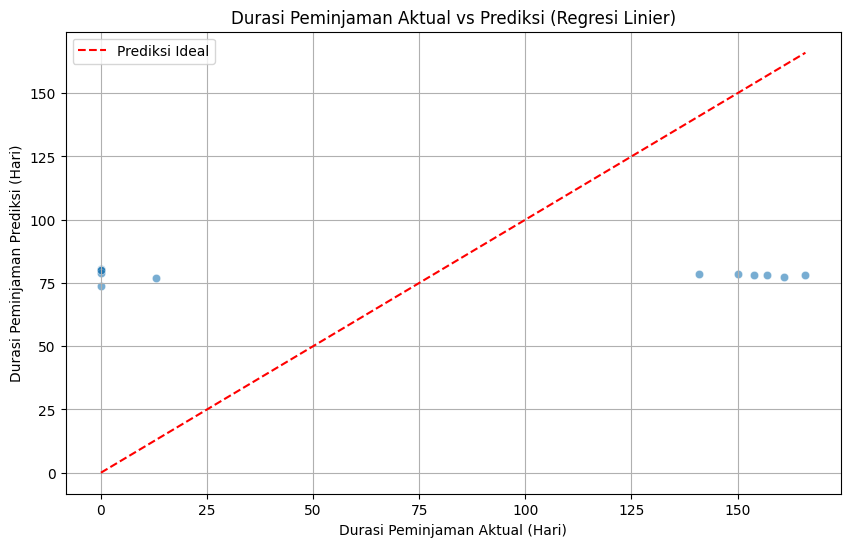

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_uji, y=y_prediksi, alpha=0.6)

sns.lineplot(x=y_uji, y=y_uji, color='red', linestyle='--', label='Prediksi Ideal')


plt.title('Durasi Peminjaman Aktual vs Prediksi (Regresi Linier)')
plt.xlabel('Durasi Peminjaman Aktual (Hari)')
plt.ylabel('Durasi Peminjaman Prediksi (Hari)')
plt.legend()
plt.grid(True)
plt.show()

### Penjelasan Plot Hasil Prediksi vs Aktual

Plot di atas memvisualisasikan perbandingan antara nilai 'Durasi_Peminjaman_Hari' yang sebenarnya (Actual Loan Duration) dengan nilai 'Durasi_Peminjaman_Hari' yang diprediksi oleh model (Predicted Loan Duration).

*   **Titik-titik Biru**: Setiap titik biru mewakili satu data pinjaman dalam set pengujian. Posisi horizontal titik menunjukkan durasi peminjaman aktual, dan posisi vertikal menunjukkan durasi peminjaman yang diprediksi oleh model untuk data tersebut.
*   **Garis Merah Putus-putus ('Prediksi Ideal')**: Garis ini mewakili skenario ideal di mana nilai prediksi model sama persis dengan nilai aktual (y = x). Jika model sempurna, semua titik biru akan berada tepat di atas garis merah ini.

Dari plot ini, kita bisa melihat bahwa titik-titik biru tersebar luas dan tidak terkonsentrasi di sekitar garis merah. Ini secara visual mengkonfirmasi hasil evaluasi metrik bahwa model Regresi Linier kita tidak mampu memprediksi durasi peminjaman secara akurat hanya berdasarkan tahun terbit buku. Sebaran yang luas menunjukkan bahwa ada faktor-faktor lain yang jauh lebih berpengaruh terhadap durasi peminjaman selain tahun terbit buku.